In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset

bank_df = pd.read_csv('bank.csv')

### EDA

In [3]:
bank_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
bank_df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [6]:
bank_df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

    The first 3 columns "RowNumber","CustomerId" and "Surname" are not useful for our model and hence we can drop these 3 columns from our bank_df dataset

In [7]:
# Dropping the redundant columns

bank_df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [8]:
bank_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# Dealing with categorical data -->  at first we are label encoding "Geography" and "Gender" and then OneHotEncoding them both

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
bank_df.iloc[:,1:2]= LE.fit_transform(bank_df.iloc[:, 1:2])
bank_df.head()
bank_df.iloc[:,2:3]= LE.fit_transform(bank_df.iloc[:, 2:3])
bank_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# Now OneHotEncoding "Geography" and "Gender"

encoded_1 = pd.DataFrame(to_categorical(bank_df.iloc[:, 1]))
encoded_2 = pd.DataFrame(to_categorical(bank_df.iloc[:, 2]))

In [11]:
# Adding the encoded columns to the dataframe
bank_df_OHE = pd.concat([encoded_1, bank_df], axis = 1)

In [12]:
bank_df_OHE.head()

,0,1,2,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,0.0,0.0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,0.0,0.0,1.0,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,1.0,0.0,0.0,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,1.0,0.0,0.0,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,0.0,0.0,1.0,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [13]:
# Renaming the coded columns
bank_df_OHE.rename(columns ={0: 'France',1: 'Germany',2: 'Spain'}, inplace =True)

In [14]:
# Adding the coded gender column
bank_df_OHE = pd.concat([encoded_2, bank_df_OHE], axis = 1)

In [15]:
bank_df_OHE.head()

,0,1,France,Germany,Spain,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,0.0,1.0,0.0,0.0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,1.0,0.0,0.0,0.0,1.0,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,1.0,0.0,1.0,0.0,0.0,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,1.0,0.0,1.0,0.0,0.0,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,1.0,0.0,0.0,0.0,1.0,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [16]:
# Renaming the coded gender columns
bank_df_OHE.rename(columns ={0: 'Female',1: 'Male'}, inplace =True)

In [17]:
bank_df_OHE.head()

,Female,Male,France,Germany,Spain,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,0.0,1.0,0.0,0.0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,1.0,0.0,0.0,0.0,1.0,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,1.0,0.0,1.0,0.0,0.0,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,1.0,0.0,1.0,0.0,0.0,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,1.0,0.0,0.0,0.0,1.0,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [18]:
#Dropping the original Geography and Gender columns
bank_df_OHE.drop(['Geography','Gender'],axis=1,inplace=True)

In [19]:
bank_df_OHE.describe().T

,count,mean,std,min,25%,50%,75%,max
Female,10000.0,0.454300,0.497922,0.00,0.00,0.000,1.0000,1.00
Male,10000.0,0.545700,0.497922,0.00,0.00,1.000,1.0000,1.00
France,10000.0,0.501400,0.500021,0.00,0.00,1.000,1.0000,1.00
Germany,10000.0,0.250900,0.433565,0.00,0.00,0.000,1.0000,1.00
Spain,10000.0,0.247700,0.431708,0.00,0.00,0.000,0.0000,1.00
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00


0    7963
1    2037
Name: Exited, dtype: int64


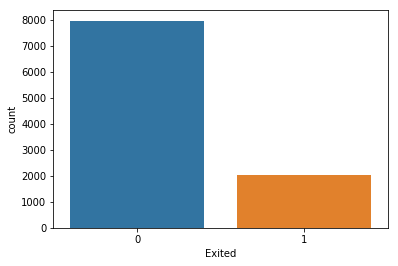

In [20]:
sns.countplot(bank_df_OHE['Exited'])
print(bank_df_OHE['Exited'].value_counts())

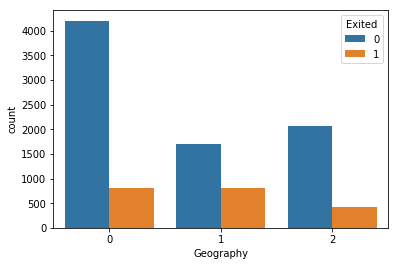

In [21]:
sns.countplot(x=bank_df['Geography'],hue=bank_df['Exited'])

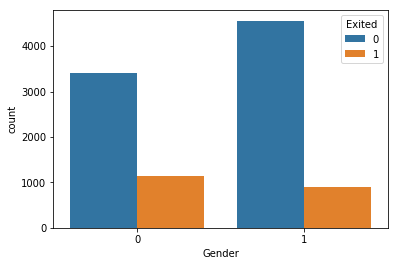

In [22]:
sns.countplot(x=bank_df['Gender'],hue=bank_df['Exited'])

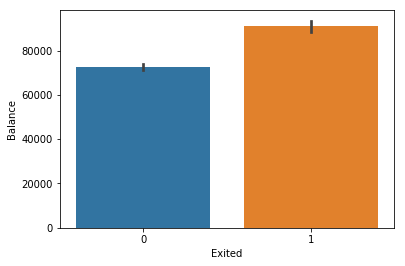

In [23]:
sns.barplot(x=bank_df['Exited'],y=bank_df['Balance'])

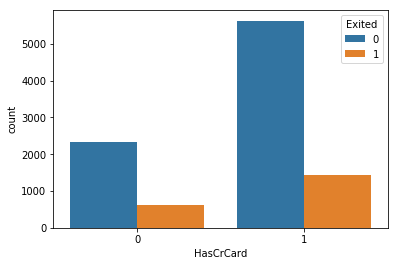

In [24]:
sns.countplot(x=bank_df['HasCrCard'],hue=bank_df['Exited'])

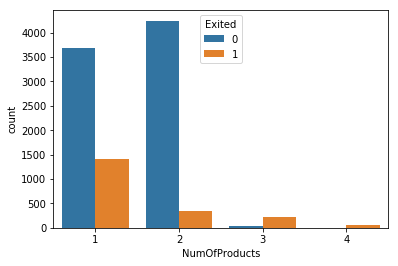

In [25]:
sns.countplot(x=bank_df['NumOfProducts'],hue=bank_df['Exited'])

### Distinguish the feature and target set 

In [26]:
bank_df_OHE.shape

(10000, 14)

In [27]:
bank_df_OHE.head()

,Female,Male,France,Germany,Spain,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,0.0,1.0,0.0,0.0,619,42,2,0.00,1,1,1,101348.88,1
1,1.0,0.0,0.0,0.0,1.0,608,41,1,83807.86,1,0,1,112542.58,0
2,1.0,0.0,1.0,0.0,0.0,502,42,8,159660.80,3,1,0,113931.57,1
3,1.0,0.0,1.0,0.0,0.0,699,39,1,0.00,2,0,0,93826.63,0
4,1.0,0.0,0.0,0.0,1.0,850,43,2,125510.82,1,1,1,79084.10,0


In [28]:
x = bank_df_OHE.iloc[:, 0:13]
y = np.ravel(bank_df_OHE['Exited'])

In [29]:
x.head()

,Female,Male,France,Germany,Spain,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.0,0.0,1.0,0.0,0.0,619,42,2,0.00,1,1,1,101348.88
1,1.0,0.0,0.0,0.0,1.0,608,41,1,83807.86,1,0,1,112542.58
2,1.0,0.0,1.0,0.0,0.0,502,42,8,159660.80,3,1,0,113931.57
3,1.0,0.0,1.0,0.0,0.0,699,39,1,0.00,2,0,0,93826.63
4,1.0,0.0,0.0,0.0,1.0,850,43,2,125510.82,1,1,1,79084.10


In [30]:
y[0:5]


array([1, 0, 1, 0, 0], dtype=int64)

### Divide the data set into Train and test sets

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y,stratify = y, test_size = 0.2, random_state = 100)

### Normalize the train and test data

In [32]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
X_train.shape

(8000, 13)

### Initialize & build the model 

In [34]:
# Initializing the constructor

model1 = Sequential()

In [35]:
# Defining model architecture

model1.add(Dense(13, activation='tanh', input_shape=(13,)))
model1.add(Dense(50, activation ='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Executing the model
model1.fit(X_train, Y_train,epochs=15, batch_size=100, verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/15
8000/8000 [==============================] - 0s 38us/sample - loss: 0.5290 - acc: 0.7824
Epoch 2/15
8000/8000 [==============================] - 0s 13us/sample - loss: 0.4442 - acc: 0.8062
Epoch 3/15
8000/8000 [==============================] - 0s 16us/sample - loss: 0.4152 - acc: 0.8240
Epoch 4/15
8000/8000 [==============================] - 0s 13us/sample - loss: 0.3996 - acc: 0.8335
Epoch 5/15
8000/8000 [==============================] - 0s 13us/sample - loss: 0.3864 - acc: 0.8395
Epoch 6/15
8000/8000 [==============================] - 0s 12us/sample - loss: 0.3748 - acc: 0.8479
Epoch 7/15
8000/8000 [==============================] - 0s 12us/sample - loss: 0.3664 - acc: 0.8496
Epoch 8/15
8000/8000 [==============================] - 0s 12us/sample - loss: 0.3590 - acc: 0.8535
Epoch 9/15
8000/8000 [==============================] - 0s 12us/sample - loss: 0

In [36]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                700       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 933
Trainable params: 933
Non-trainable params: 0
_________________________________________________________________


In [37]:
loss, acc = model1.evaluate(X_test, Y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.846
Loss: 0.356


### Model Evaluation

In [38]:
y_pred = np.round(model1.predict(X_test))

loss, acc = model1.evaluate(X_train, Y_train, verbose=0)
print('Train Accuracy: %.3f' % acc)

loss, acc = model1.evaluate(X_test, Y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Train Accuracy: 0.864
Test Accuracy: 0.846


### Optimize the model

In [248]:
# Initializing the constructor

model2 = Sequential()

In [249]:
# Define model architecture ...adding BatchNormalization and additional layers and in the compile function using nadam Optimizer
# Also changing the batch size
model2.add(BatchNormalization())
model2.add(Dense(100, activation='tanh', input_shape=(13,)))
model2.add(Dense(100, activation ='tanh'))
model2.add(Dense(100, activation ='relu'))
model2.add(Dense(50, activation ='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
               optimizer='nadam',
               metrics=['accuracy'])
model2.fit(X_train, Y_train, epochs=10, batch_size=50, verbose=1)

Epoch 1/10
8000/8000 [==============================] - 1s 145us/sample - loss: 0.4013 - acc: 0.8313
Epoch 2/10
8000/8000 [==============================] - 0s 58us/sample - loss: 0.3576 - acc: 0.8522
Epoch 3/10
8000/8000 [==============================] - 0s 62us/sample - loss: 0.3540 - acc: 0.8533
Epoch 4/10
8000/8000 [==============================] - 0s 60us/sample - loss: 0.3501 - acc: 0.8574
Epoch 5/10
8000/8000 [==============================] - 0s 59us/sample - loss: 0.3454 - acc: 0.8543
Epoch 6/10
8000/8000 [==============================] - 0s 58us/sample - loss: 0.3381 - acc: 0.8602
Epoch 7/10
8000/8000 [==============================] - 0s 60us/sample - loss: 0.3381 - acc: 0.8636
Epoch 8/10
8000/8000 [==============================] - 0s 57us/sample - loss: 0.3408 - acc: 0.8600
Epoch 9/10
8000/8000 [==============================] - 0s 57us/sample - loss: 0.3330 - acc: 0.8625
Epoch 10/10
8000/8000 [==============================] - 0s 59us/sample - loss: 0.3334 - acc: 0.864

In [250]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_v1_23 (B multiple                  52        
_________________________________________________________________
dense_118 (Dense)            multiple                  1400      
_________________________________________________________________
dense_119 (Dense)            multiple                  10100     
_________________________________________________________________
dense_120 (Dense)            multiple                  10100     
_________________________________________________________________
dense_121 (Dense)            multiple                  5050      
_________________________________________________________________
dense_122 (Dense)            multiple                  51        
Total params: 26,753
Trainable params: 26,727
Non-trainable params: 26
_________________________________________________________________


In [251]:
loss, acc = model2.evaluate(X_test, Y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.858
Loss: 0.349


In [252]:
y_pred_2 = np.round(model2.predict(X_test))

loss, acc = model2.evaluate(X_train, Y_train, verbose=0)
print('Train Accuracy: %.3f' % acc)

loss, acc = model2.evaluate(X_test, Y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Train Accuracy: 0.868
Test Accuracy: 0.858


### Predict the results using 0.5 as a threshold

In [253]:
y_pred = (y_pred > 0.5).astype(int)
print(y_pred[:10])

[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]


In [254]:
y_pred_2 = (y_pred_2 > 0.5).astype(int)
print(y_pred_2[:10])

[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]]


### Print the Accuracy score and confusion matrix

    Model1 Accuracy score and Confusion Matrix

In [255]:
loss, acc = model1.evaluate(X_train, Y_train, verbose=0)
print('Train Accuracy: %.3f' % acc)

loss, acc = model1.evaluate(X_test, Y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Train Accuracy: 0.864
Test Accuracy: 0.846


In [256]:
metrics.confusion_matrix(Y_test, y_pred)    

array([[1534,   59],
       [ 248,  159]], dtype=int64)

In [257]:
cr=metrics.classification_report(Y_test,y_pred)
print(cr)

             precision    recall  f1-score   support

          0       0.86      0.96      0.91      1593
          1       0.73      0.39      0.51       407

avg / total       0.83      0.85      0.83      2000



#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

    Model2 Accuracy score and Confusion Matrix

In [258]:
loss, acc = model2.evaluate(X_train, Y_train, verbose=0)
print('Train Accuracy: %.3f' % acc)

loss, acc = model2.evaluate(X_test, Y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Train Accuracy: 0.868
Test Accuracy: 0.858


In [259]:
metrics.confusion_matrix(Y_test, y_pred_2)

array([[1521,   72],
       [ 213,  194]], dtype=int64)

In [260]:
cr=metrics.classification_report(Y_test,y_pred_2)
print(cr)

             precision    recall  f1-score   support

          0       0.88      0.95      0.91      1593
          1       0.73      0.48      0.58       407

avg / total       0.85      0.86      0.85      2000



#### Though both the models have good training and testing accuracy which shows its a good generalized model with no overfitting issues, they lack a good recall score for the customers who churn out. This is may be due to class imbalance and we might need to treat the target class imbalance by over sampling(SMOTE) or Under sampling (RandomUnderSampler) techniques.

#### With the current optimized model we are approximately able to identify 50% of those customrers who are most likely to churn out. With class imbalance treatment, we might be able to get a better recall score for the customers who are most likely to churn